<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/hw/hw3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

Let  𝜎=20%  fixed. plot  𝑇↦𝑓(0.2,𝑇)  when  𝑇  is ranging over  (0.5,2) .

In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      return max([0, (s - k)*otype])


class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      return max([0, (s - k)*otype])


class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 maturity = 1
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.maturity = maturity

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

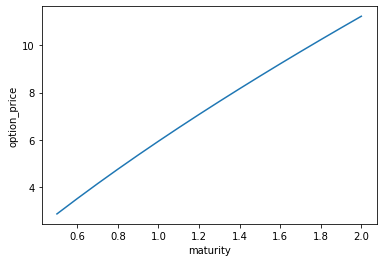

In [9]:
import numpy as np
import matplotlib.pyplot as plt

gbm1 = Gbm()
option1 = VanillaOption(otype=1)
maturity_list = []
option_price_list = []

for i in range(16):
  maturity = i*0.1+0.5
  gbm1.maturity = maturity
  maturity_list.append(maturity)
  option_price = gbm1.bsm_price(option1)
  option_price_list.append(option_price)

plt.plot(maturity_list, option_price_list)

#decorations
plt.xlabel('maturity')
plt.ylabel('option_price')
plt.show()

Let  𝑇=1  fixed. plot  𝜎↦𝑓(𝜎,1)  when  𝜎  is ranging over  (.05,0.5)

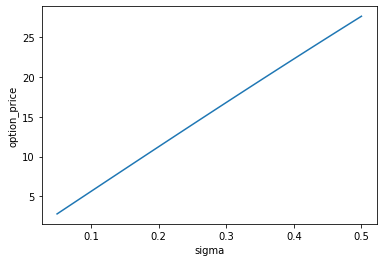

In [13]:

gbm2 = Gbm()
option2 = VanillaOption(otype=1)
sigma_list = []
option_price_list = []

for i in range(46):
  sigma = i*0.01+0.05
  gbm2.vol_ratio = sigma
  sigma_list.append(sigma)
  option_price = gbm2.bsm_price(option1)
  option_price_list.append(option_price)

plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option_price')
plt.show()

Through our ovservation, we can find that as sigma and maturity increases, the option price increases. The same behavior is also true for put option.

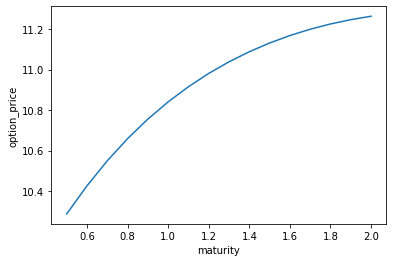

In [16]:
gbm3 = Gbm()
option3 = VanillaOption(otype=-1)
maturity_list = []
option_price_list = []

for i in range(16):
  maturity = i*0.1+0.5
  gbm3.maturity = maturity
  maturity_list.append(maturity)
  option_price = gbm3.bsm_price(option3)
  option_price_list.append(option_price)

plt.plot(maturity_list, option_price_list)

#decorations
plt.xlabel('maturity')
plt.ylabel('option_price')
plt.show()

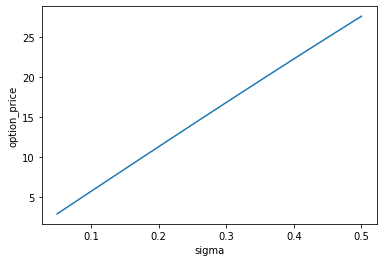

In [18]:
gbm4 = Gbm()
option4 = VanillaOption(otype=-1)
sigma_list = []
option_price_list = []

for i in range(46):
  sigma = i*0.01+0.05
  gbm4.vol_ratio = sigma
  sigma_list.append(sigma)
  option_price = gbm4.bsm_price(option4)
  option_price_list.append(option_price)

plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option_price')
plt.show()

**Proof:**

For the change of option price as volatility $\sigma$ changes,  we have the equation of $\frac{\partial C_t}{\partial \sigma}$, 

$$\frac{\partial C_0}{\partial \sigma} = S_0\frac{\partial \mathcal{N}(d_{1})}{\partial \sigma} -K e^{-rT} \frac{\partial \mathcal{N}(d_{2})}{\partial \sigma}= S_0\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -K e^{-rT} \frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} \frac{\partial d_{2}}{\partial \sigma}.$$



   $\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_1^2}{2}}$, $\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_2^2}{2}}$, and $d_2 = d_{1} - \sigma \sqrt{T-t}$,


therefore,

$$\frac{\partial C_t}{\partial \sigma} = S_{t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -  K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{t}}{K} e^{r(T-t)} (\frac{\partial d_{1}}{\partial \sigma} - \sqrt{T-t}),$$


from put-call parity, we have

$$C_t + K e^{-r(T-t)} = P_t + S_{t},$$

$$\frac{\partial C_t}{\partial \sigma} = \frac{\partial P_t}{\partial \sigma} = S_{t} \sqrt{T-t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \geq 0.$$

Such that when volitility is increasing, the option price is also increasing.